In [ ]:
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.9/55.9 KB 6.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 111.0/111.0 KB 14.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 97.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.4/129.4 KB 16.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 KB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.2/112.2 KB 16.1 MB/s eta 0:00:00
  Attempting uninstall: requests
    Found existing installation: requests 2.25.1
    Uninstalling requests-2.25.1:
      Successfully uninstalled requests-2.25.1
  Attempting uninstall: html5lib
    Found existing installation: html5lib 1.0.1
    Uninstalling html5lib-1.0.1:
      Successfully uninstalled html5lib-1.0.1
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.6.3
   

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#1. What was the change in price of the stock overtime?
In this section we'll go over how to handle requesting stock information with pandas, and how to analyze basic attributes of a stock.

In [ ]:
import yfinance as yf
ticker = yf.Ticker('GOOGL').info
market_price = ticker['regularMarketPrice']
previous_close_price = ticker['regularMarketPreviousClose']
print('Ticker: GOOGL')
print('Market Price:', market_price)
print('Previous Close Price:', previous_close_price)

Price data removed from info (key='regularMarketPrice'). Use Ticker.fast_info or history() instead
Price data removed from info (key='regularMarketPreviousClose'). Use Ticker.fast_info or history() instead
Ticker: GOOGL
Market Price: None
Previous Close Price: None


In [ ]:
import yfinance as yf
# Set the start and end date
start_date = '2020-01-01'
end_date = '2023-02-02'
# Set the ticker
ticker = 'GOOGL'
# Get the data
data = yf.download(ticker, start_date, end_date)
# Print the last 5 rows
data["Date"] = data.index

data = data[["Date", "Open", "High","Low", "Close", "Adj Close", "Volume"]]
data.reset_index(drop=True, inplace=True)
print(data.head())

[*********************100%***********************]  1 of 1 completed
                       Date       Open       High        Low      Close  \
0 2020-01-02 00:00:00-05:00  67.420502  68.433998  67.324501  68.433998   
1 2020-01-03 00:00:00-05:00  67.400002  68.687500  67.365997  68.075996   
2 2020-01-06 00:00:00-05:00  67.581497  69.916000  67.550003  69.890503   
3 2020-01-07 00:00:00-05:00  70.023003  70.175003  69.578003  69.755501   
4 2020-01-08 00:00:00-05:00  69.740997  70.592499  69.631500  70.251999   

   Adj Close    Volume  
0  68.433998  27278000  
1  68.075996  23408000  
2  69.890503  46768000  
3  69.755501  34330000  
4  70.251999  35314000  


#Descriptive Statistics about the Data

In [ ]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,777.000000,777.000000,777.000000,777.000000,777.000000,7.770000e+02
mean,103.938940,105.166749,102.714855,103.963999,103.963999,3.504824e+07
std,26.264194,26.368082,26.032875,26.182424,26.182424,1.536957e+07
min,52.818501,53.345501,50.443501,52.706501,52.706501,9.312000e+06
25%,78.850502,79.594002,77.931503,78.812500,78.812500,2.514200e+07
50%,102.911003,104.150002,101.721001,102.944000,102.944000,3.119600e+07
75%,126.133499,127.596001,124.953499,126.378502,126.378502,4.025200e+07
max,151.250000,151.546494,148.899002,149.838501,149.838501,1.232000e+08


#Information About the Data
#####.info() method prints information about a DataFrame including the index dtype and columns, non-null values, and memory usage.

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777 entries, 0 to 776
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype                           
---  ------     --------------  -----                           
 0   Date       777 non-null    datetime64[ns, America/New_York]
 1   Open       777 non-null    float64                         
 2   High       777 non-null    float64                         
 3   Low        777 non-null    float64                         
 4   Close      777 non-null    float64                         
 5   Adj Close  777 non-null    float64                         
 6   Volume     777 non-null    int64                           
dtypes: datetime64[ns, America/New_York](1), float64(5), int64(1)
memory usage: 42.6 KB


#Closing Price
The closing price is the last price at which the stock is traded during the regular trading day. A stock’s closing price is the standard benchmark used by investors to track its performance over time.

Text(0.5, 1.0, 'Closing Price of Google')

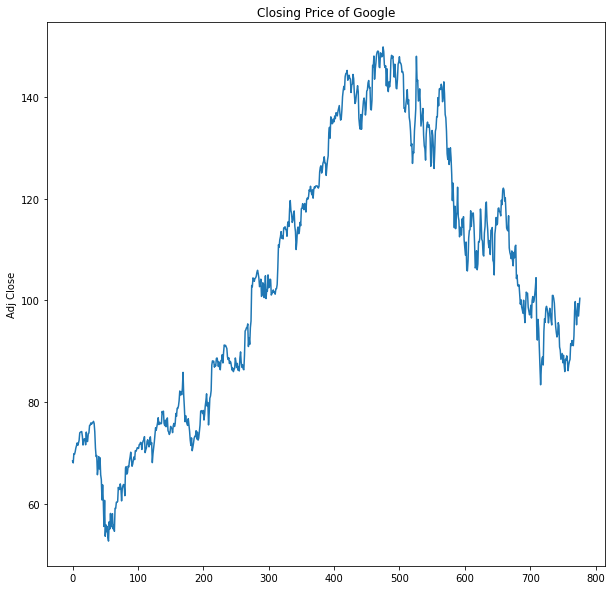

In [ ]:
plt.figure(figsize=(10, 10))
data['Adj Close'].plot()
plt.ylabel('Adj Close')
plt.xlabel(None)
plt.title("Closing Price of Google")


#Volume of Sales
Volume is the amount of an asset or security that changes hands over some period of time, often over the course of a day. For instance, the stock trading volume would refer to the number of shares of security traded between its daily open and close. Trading volume, and changes to volume over the course of time, are important inputs for technical traders.

Text(0.5, 1.0, 'Sales Volume for Google')

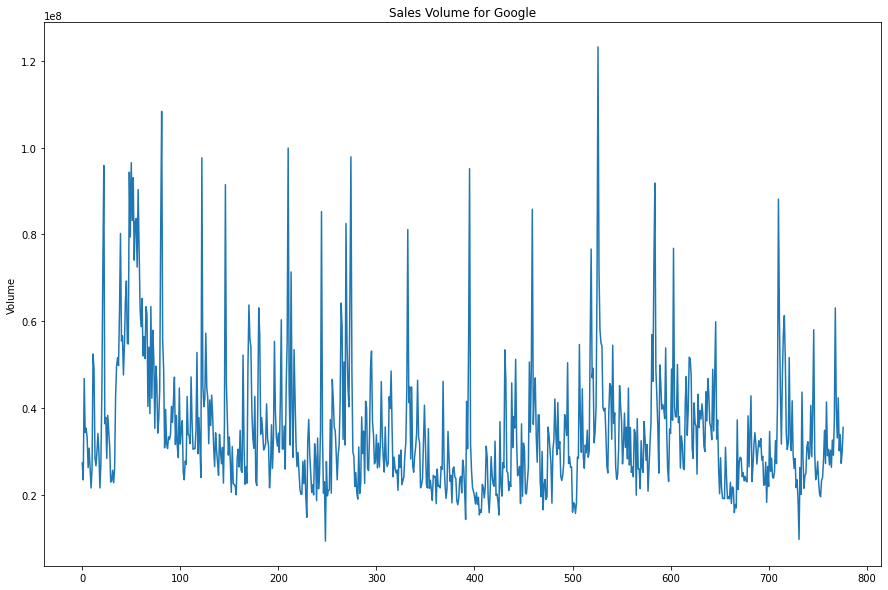

In [ ]:
# Now let's plot the total volume of stock being traded each day
plt.figure(figsize=(15, 10))
data['Volume'].plot()
plt.ylabel('Volume')
plt.xlabel(None)
plt.title("Sales Volume for Google")


#2. What was the moving average of the various stocks?
The moving average (MA) is a simple technical analysis tool that smooths out price data by creating a constantly updated average price. The average is taken over a specific period of time, like 10 days, 20 minutes, 30 weeks, or any time period the trader chooses.

<ipython-input-10-4d79d66a8e5c>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[column_name] = data['Adj Close'].rolling(ma).mean()


<Figure size 1080x720 with 0 Axes>

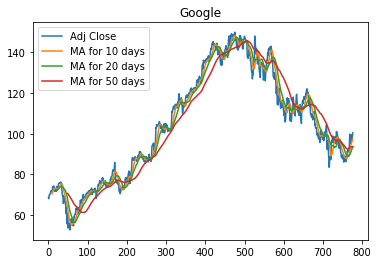

In [ ]:
ma_day = [10, 20, 50]

for ma in ma_day:
    column_name = f"MA for {ma} days"
    data[column_name] = data['Adj Close'].rolling(ma).mean()
    
plt.figure(figsize=(15, 10));
data[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot();
plt.title("Google")
plt.show();

#3. What was the daily return of the stock on average?
Now that we've done some baseline analysis, let's go ahead and dive a little deeper. We're now going to analyze the risk of the stock. In order to do so we'll need to take a closer look at the daily changes of the stock, and not just its absolute value. Let's go ahead and use pandas to retrieve teh daily returns for the Apple stock.

<ipython-input-11-eb0f4934482d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Daily Return'] = data['Adj Close'].pct_change()


Text(0.5, 1.0, 'GOOGLE')

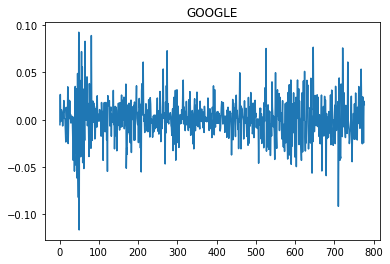

In [ ]:
# We'll use pct_change to find the percent change for each day
data['Daily Return'] = data['Adj Close'].pct_change()

data['Daily Return'].plot()
plt.title('GOOGLE')

Great, now let's get an overall look at the average daily return using a histogram. We'll use seaborn to create both a histogram and kde plot on the same figure.

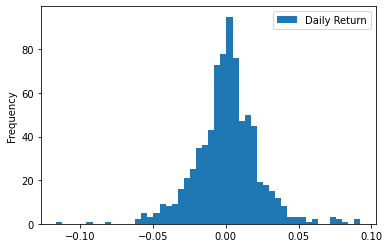

In [ ]:
data['Daily Return'].plot.hist(subplots=True, legend=True, layout=(1, 1),bins=50);

#6. Predicting the closing price stock price of APPLE inc:

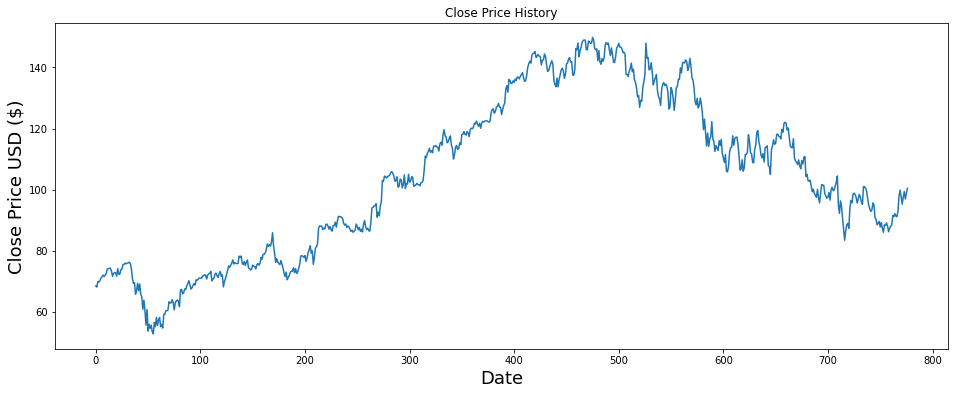

In [ ]:
plt.figure(figsize=(16,6))
plt.title('Close Price History')
plt.plot(data['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [ ]:
data = data.filter(['Close'])
# Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .95 ))

training_data_len

739

In [ ]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)



In [ ]:
# Create the training data set 
# Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()
        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_train.shape

[array([0.1619188 , 0.15823308, 0.17691391, 0.17552403, 0.18063561,
       0.1882284 , 0.19294874, 0.19864722, 0.19378785, 0.19821993,
       0.20386178, 0.21897518, 0.22038053, 0.22121439, 0.2216365 ,
       0.21210313, 0.19437468, 0.20403678, 0.20722829, 0.20596714,
       0.19491516, 0.22056064, 0.20141662, 0.20174605, 0.21714779,
       0.21876412, 0.23397539, 0.23469606, 0.23910763, 0.23641026,
       0.23915908, 0.23952456, 0.24231972, 0.23826341, 0.22100333,
       0.18826437, 0.17099927, 0.1731355 , 0.13426056, 0.14676935,
       0.17099927, 0.14598176, 0.16856958, 0.13416277, 0.124372  ,
       0.08321666, 0.11378329, 0.08069943, 0.0295577 , 0.08243421,
       0.00971359, 0.03290881, 0.01907714, 0.02961948, 0.00724785,
       0.        , 0.03906023, 0.02444612, 0.0560011 , 0.02889367])]
[0.047450864250903835]

[array([0.1619188 , 0.15823308, 0.17691391, 0.17552403, 0.18063561,
       0.1882284 , 0.19294874, 0.19864722, 0.19378785, 0.19821993,
       0.20386178, 0.21897518, 0.2

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=10)

Epoch 1/10
679/679 [==============================] - 8s 8ms/step - loss: 0.0062
Epoch 2/10
679/679 [==============================] - 7s 11ms/step - loss: 0.0023
Epoch 3/10
679/679 [==============================] - 6s 8ms/step - loss: 0.0021
Epoch 4/10
679/679 [==============================] - 5s 8ms/step - loss: 0.0015
Epoch 5/10
679/679 [==============================] - 5s 8ms/step - loss: 0.0012
Epoch 6/10
679/679 [==============================] - 5s 8ms/step - loss: 0.0010
Epoch 7/10
679/679 [==============================] - 5s 8ms/step - loss: 0.0010
Epoch 8/10
679/679 [==============================] - 5s 8ms/step - loss: 9.5169e-04
Epoch 9/10
679/679 [==============================] - 5s 8ms/step - loss: 0.0011
Epoch 10/10
679/679 [==============================] - 5s 8ms/step - loss: 0.0011


In [ ]:
# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2002 
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

2/2 [==============================] - 0s 17ms/step


2.0722582754340104

<ipython-input-25-0cdd5e68a3a9>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


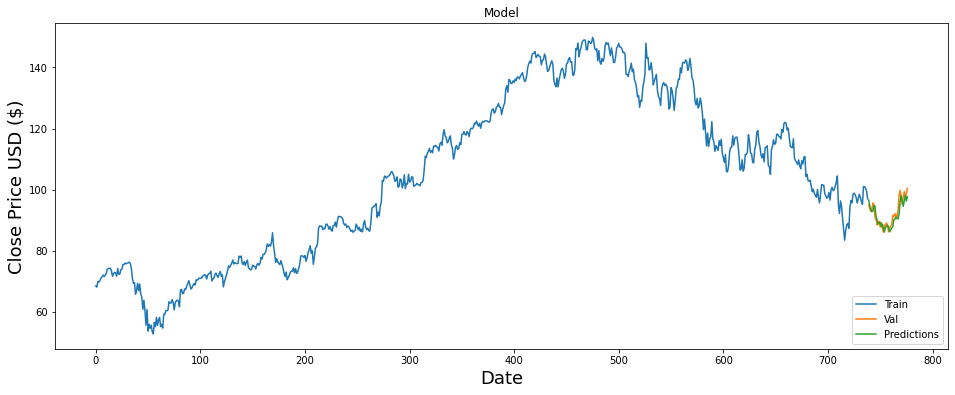

In [ ]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [ ]:
# Show the valid and predicted prices
valid

,Close,Predictions
739,94.940002,96.521439
740,93.709999,94.734055
741,92.830002,93.594452
742,93.309998,92.754311
743,95.629997,92.983292
744,95.070000,94.793823
745,90.860001,94.497147
746,90.260002,91.089615
747,88.440002,90.198792
748,89.019997,88.677742


#Summary
In this notebook, you discovered and explored stock data.

Specifically, you learned:

How to load stock market data from the YAHOO Finance website using yfinance.
How to explore and visualize time-series data using Pandas, Matplotlib, and Seaborn.
How to measure the correlation between stocks.
How to measure the risk of investing in a particular stock.
Do you have any questions? Ask your questions in the comments below and I will do my best to answer.

References: https://www.investopedia.com/terms/c/correlation.asp Jose Portilla Udemy Course: Learning Python for Data Analysis and Visualization